# Problem Statement:

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('wine.csv')

# Data Exploration

In [3]:
data.shape

(178, 14)

In [4]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
data.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
33,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740


### Quick Data Check

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Statistical summary

In [8]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [10]:
data['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [11]:
data.duplicated().sum()

0

- There is no duplicate values present in dataset.

### Identifying Missing Values

In [12]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

- There is no missing values in dataset

# Feture Engineering

In [13]:
data['ID'] = range(1, 179, 1)
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Type', axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.72234737],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.70288581],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.68342426],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.68342426],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.70288581],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.72234737]])

# Dimensionality Reducation (PCA)

In [24]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3)

principal_components = pca_model.fit_transform(X_scaled)

In [25]:
pca_model.explained_variance_

array([5.50912479, 2.51112636, 1.46311157])

In [26]:
pca_model.explained_variance_ratio_

array([0.39129819, 0.17835849, 0.10392085])

In [27]:
np.sum(pca_model.explained_variance_ratio_)

0.6735775287678647

In [28]:
from mpl_toolkits import mplot3d

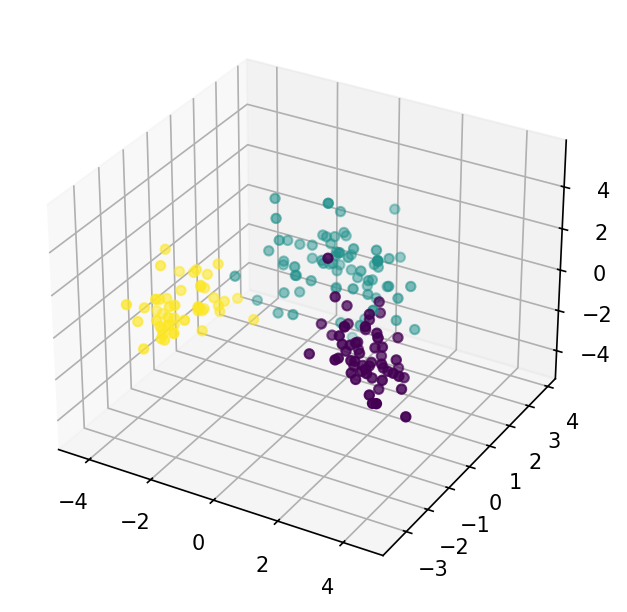

In [31]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(principal_components[:,0],principal_components[:,1],principal_components[:,2],c=data['Type']);

# K-Means Clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
ssd = []
silhouette_scores = []

for k in range(2,11):
    
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = model.fit_predict(principal_components)
    
    score = silhouette_score(principal_components, kmeans_labels)
    
    ssd.append(model.inertia_)
    silhouette_scores.append(score)

    
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(principal_components)
#     inertia.append(kmeans.inertia_)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

(2.0, 11.0)

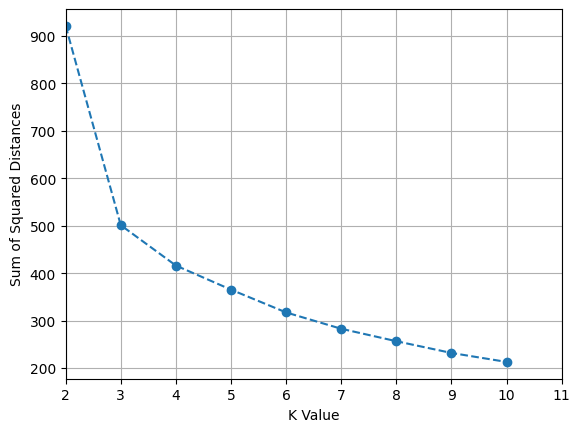

In [36]:
plt.plot(range(2,11),ssd,'o--')
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')
plt.xlim(2,11)

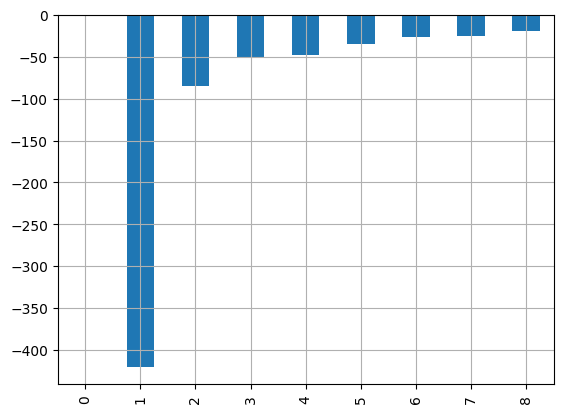

In [37]:
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

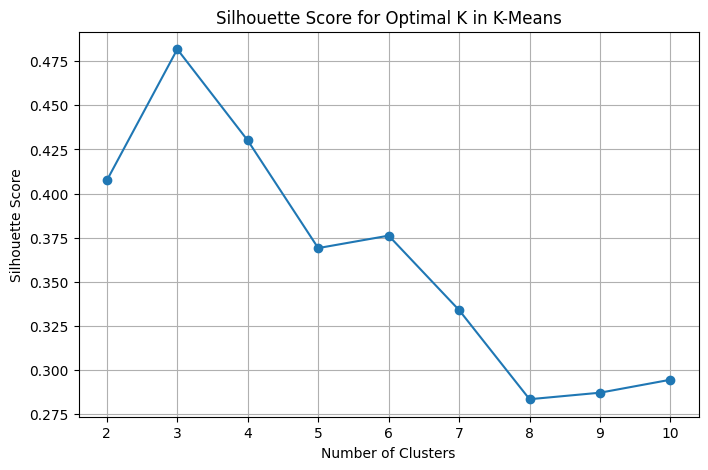

In [38]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [39]:
silhouette_scores

[0.40748327911080984,
 0.4817835370724267,
 0.4301163382866534,
 0.3691654027180675,
 0.37620731022248577,
 0.33404385106810464,
 0.283573793970263,
 0.28726702668790877,
 0.2946203776897417]

In [41]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_labels = kmeans.fit_predict(principal_components)

print("Optimal K value :",optimal_k)

Optimal K value : 3


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [43]:
data['KMenas Labels'] = kmeans.labels_
data['KMenas Labels'].value_counts()

KMenas Labels
1    67
2    61
0    50
Name: count, dtype: int64

In [45]:
data.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,KMenas Labels
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,64,1
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,130,1
14,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,15,2
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,108,1
138,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,139,0


In [46]:
data.corr()['KMenas Labels'].sort_values()

Type              -0.981704
ID                -0.925427
Nonflavanoids     -0.509486
Alcalinity        -0.485884
Malic             -0.456030
Color             -0.267752
Ash                0.061777
Magnesium          0.273495
Alcohol            0.319043
Proanthocyanins    0.524881
Hue                0.635191
Proline            0.645642
Phenols            0.734820
Dilution           0.793967
Flavanoids         0.848613
KMenas Labels      1.000000
Name: KMenas Labels, dtype: float64

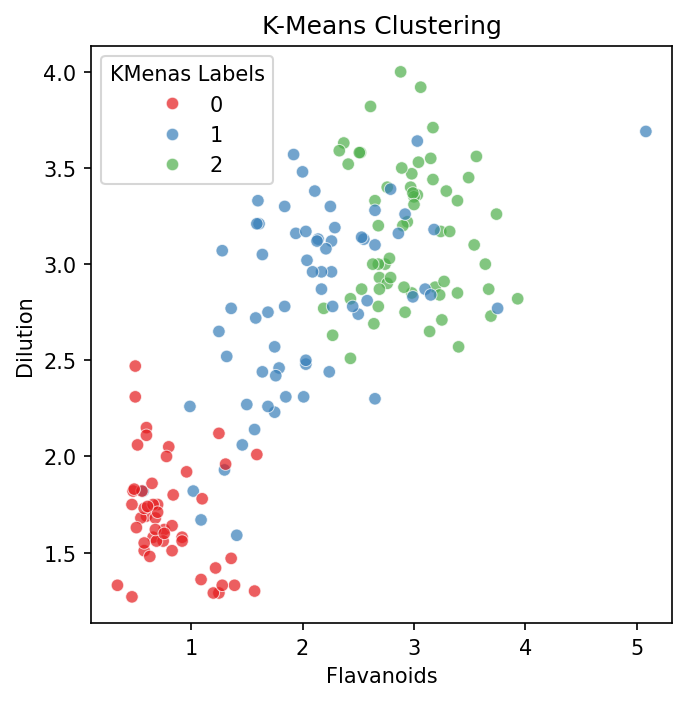

In [52]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(data=data, x='Flavanoids', y='Dilution',hue='KMenas Labels',palette='Set1',alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Flavanoids')
plt.ylabel('Dilution');

# 5. Hierarchical Clustering:

In [54]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [55]:
hierarchical_model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [56]:
hierarchy_labels = hierarchical_model.fit_predict(principal_components)

In [57]:
hierarchy_labels

array([160,  96, 133, 134,  89, 167, 124, 171, 161, 162, 140, 125, 141,
       143, 117, 139, 153, 149,  66,  69, 145,  92, 159, 177, 118, 121,
       109,  90, 105,  99, 146, 164, 136, 100,  88, 131, 114, 175, 107,
       154, 166, 111, 120, 155, 102, 113, 157, 108, 156, 119, 101, 158,
       144, 135, 151, 123,  58,  95, 130, 103,  56,  71, 147, 127, 169,
        93, 163, 128,  67, 137, 173, 112, 138,  94,  44, 168,  79, 106,
        91, 142,  52, 150,  77,  70,  72,  59,  34, 152, 110,  63,  46,
       148, 132,  83,  75, 172,  97, 122, 165,  61, 170, 126,  82,  60,
        73,  65,  76,  62,  81,  53,  49,  29,  55,  54, 174, 176,  98,
       104,  32,  45, 116,  27,  48,  22,  80,  39,  74,  87,  51,  85,
        36,  40,  50,  37, 115,  43, 129,  24,  64,  84,  68,  41,  21,
        25,  78,  86,  35,  31,  30,  38,  19,  17,  26,  42,  20,  33,
        47,  16,  14,  23,  57,   9,  18,  15,   8,   7,  10,   3,  28,
         4,   1,  11,  13,   6,  12,   5,   2,   0], dtype=int64

In [58]:
linkage_matrix =  hierarchy.linkage(hierarchical_model.children_)

In [59]:
linkage_matrix

array([[151.        , 157.        ,   1.41421356,   2.        ],
       [174.        , 175.        ,   1.41421356,   2.        ],
       [176.        , 178.        ,   1.41421356,   3.        ],
       [ 11.        ,  23.        ,   2.23606798,   2.        ],
       [ 29.        ,  45.        ,   2.23606798,   2.        ],
       [  5.        ,  39.        ,   2.23606798,   2.        ],
       [103.        , 126.        ,   2.23606798,   2.        ],
       [159.        , 160.        ,   2.23606798,   2.        ],
       [162.        , 163.        ,   2.23606798,   2.        ],
       [ 14.        ,  25.        ,   2.82842712,   2.        ],
       [  4.        ,  48.        ,   2.82842712,   2.        ],
       [141.        , 149.        ,   2.82842712,   2.        ],
       [111.        , 132.        ,   2.82842712,   2.        ],
       [  2.        , 187.        ,   3.16227766,   3.        ],
       [ 18.        , 190.        ,   3.16227766,   4.        ],
       [106.        , 119

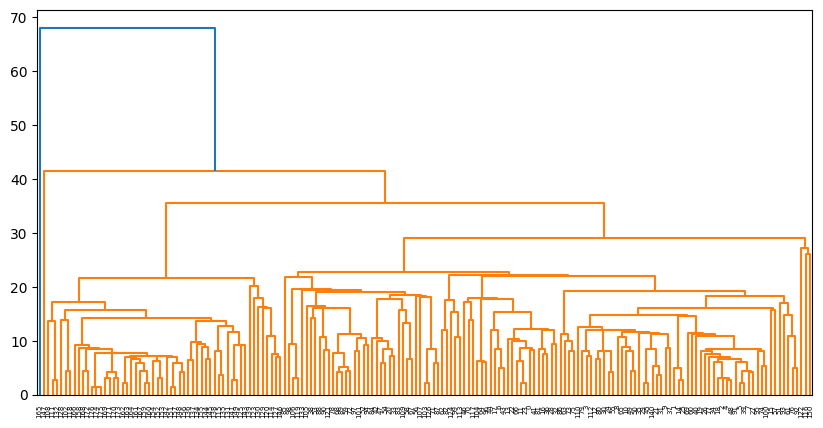

In [60]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix)

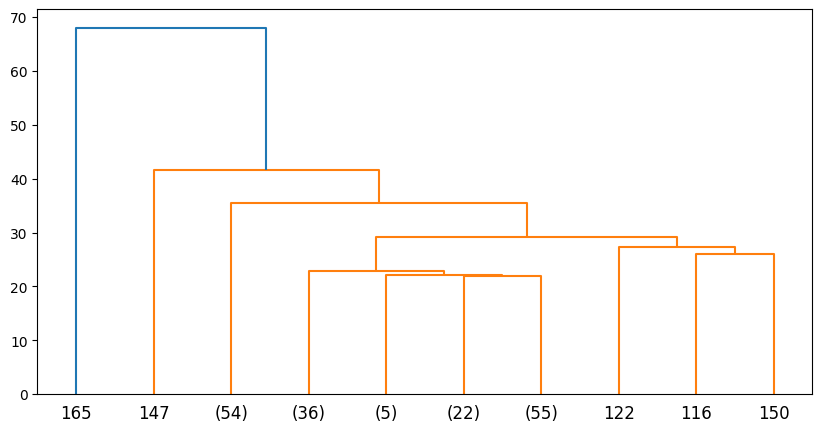

In [61]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

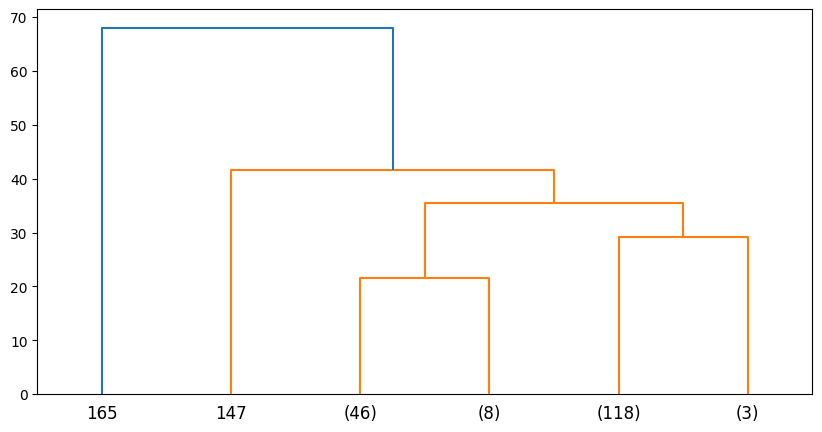

In [62]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [64]:
# Calculate linkage matrix
linked = linkage(principal_components, method='ward')

In [65]:
# Initialize an array to store the SSD for different numbers of clusters
ssd = []

# Iterate through different numbers of clusters
for k in range(1, 11):  # You can adjust the range as needed
    # Perform hierarchical clustering and assign labels
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Calculate the centroids of each cluster
    centroids = [data[labels == i].mean(axis=0) for i in range(1, k + 1)]
    
    # Calculate the SSD
    cluster_ssd = sum(((data[labels == i] - centroids[i - 1]) ** 2).sum() for i in range(1, k + 1))
    ssd.append(cluster_ssd)

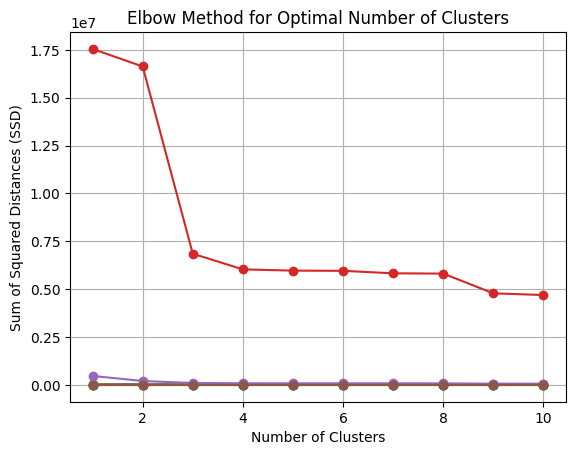

In [66]:
# Plot the SSD versus the number of clusters
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

- The elbow method suggests that the data is best represented by three clusters.

In [67]:
hierarchical_model = AgglomerativeClustering(n_clusters=3)

In [68]:
hierarchy_labels = hierarchical_model.fit_predict(principal_components)

In [69]:
hierarchy_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [70]:
data['Hierarchical Labels'] = hierarchical_model.labels_
data['Hierarchical Labels'].value_counts()

Hierarchical Labels
0    81
2    50
1    47
Name: count, dtype: int64

In [71]:
data.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,KMenas Labels,Hierarchical Labels
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,117,1,0
41,1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035,42,2,0
81,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714,82,1,0
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,130,1,0
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,92,1,0


In [72]:
data.drop('KMenas Labels',axis=1).corr()['Hierarchical Labels'].sort_values()

ID                    -0.374139
Type                  -0.371374
Alcalinity            -0.327666
Nonflavanoids         -0.178513
Hue                   -0.058246
Malic                  0.087332
Dilution               0.112811
Proanthocyanins        0.221208
Flavanoids             0.289041
Phenols                0.327046
Ash                    0.329836
Magnesium              0.388340
Color                  0.528873
Proline                0.712297
Alcohol                0.743271
Hierarchical Labels    1.000000
Name: Hierarchical Labels, dtype: float64

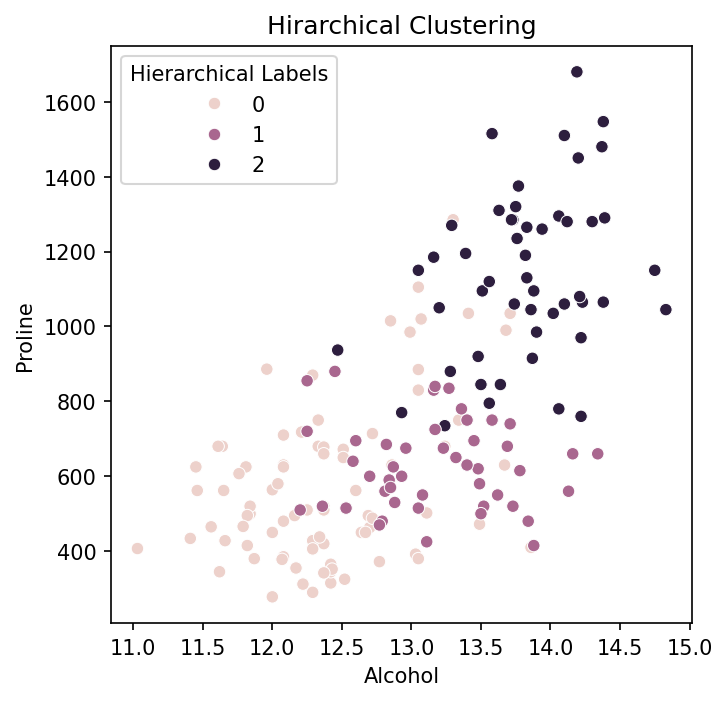

In [74]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(data=data, x='Alcohol', y='Proline',hue='Hierarchical Labels')
plt.title('Hirarchical Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Proline');

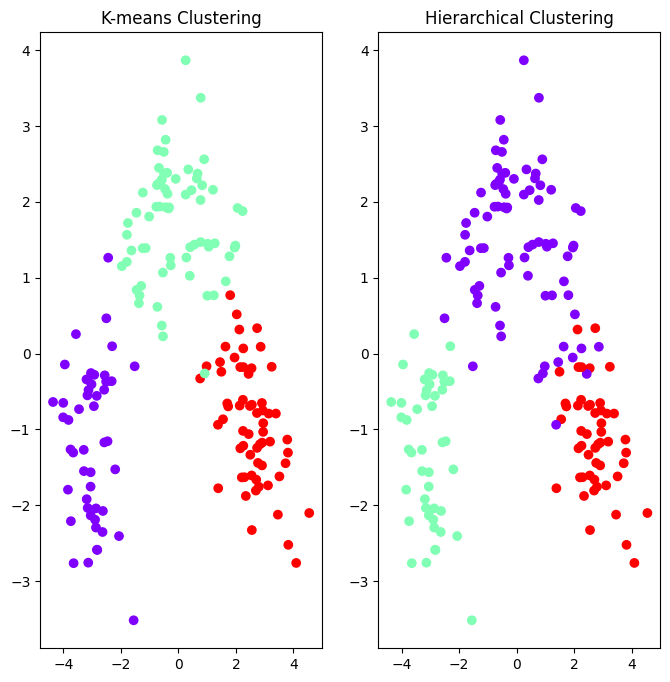

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

# Plot the first scatterplot
axes[0].scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='rainbow')
axes[0].set_title('K-means Clustering')

# Plot the second scatterplot
axes[1].scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchy_labels, cmap='rainbow')
axes[1].set_title('Hierarchical Clustering')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

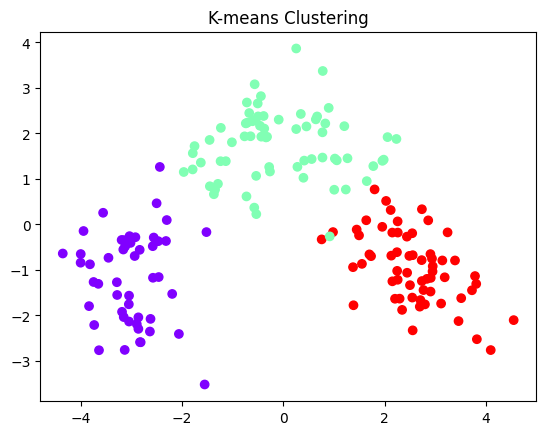

In [95]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means Clustering')
plt.show()

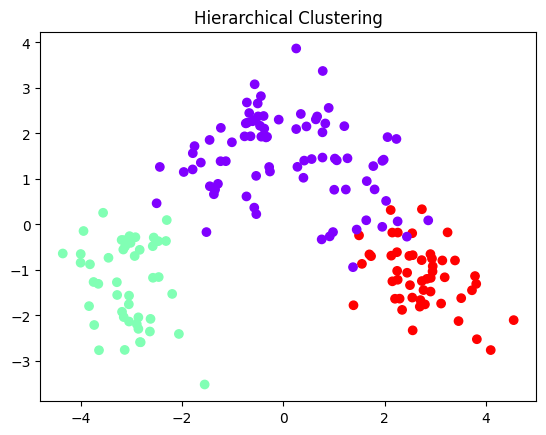

In [96]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchy_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()